In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(iris.data,columns=iris.feature_names)

df['target'] = iris.target # 0:setosa, 1:versicolor, 2:virginica

df['target_names'] = df.target.apply(lambda x:iris.target_names[x])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [4]:
df.target.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

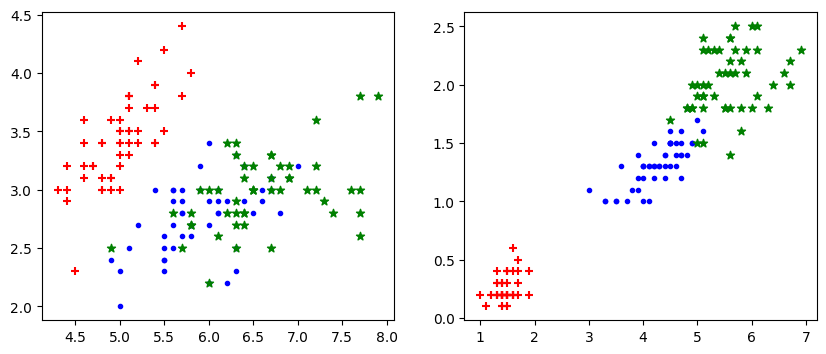

In [6]:
fig1,(sub1,sub2) = plt.subplots(ncols=2,figsize=(10,4))
sub1.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+')
sub1.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')
sub1.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',marker='*')

sub2.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+')
sub2.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')
sub2.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',marker='*')

In [7]:
X = df.drop(['target','target_names'],axis=1)
X = X.values
Y = df.target.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.5,random_state=0)
print(len(X_train))
print(len(X_test))

75
75


In [8]:
svc = SVC(probability=True) # support vector classifier
svc.fit(X_train,Y_train)

SVC(probability=True)

In [13]:
Yp_train = svc.predict(X_train)
print(svc.score(X_train,Y_train))
print(svc.predict_proba(X_train[:5]))
print(Yp_train[:5])
print(Y_train[:5])

0.96
[[0.94800634 0.03692269 0.01507097]
 [0.0188232  0.27921287 0.70196394]
 [0.16168708 0.81074667 0.02756625]
 [0.95881575 0.02741681 0.01376744]
 [0.01104509 0.87633437 0.11262053]]
[0 2 1 0 1]
[0 2 1 0 1]


In [14]:
Yp_test = svc.predict(X_test)
print(svc.score(X_test,Y_test))
print(svc.predict_proba(X_test[:5]))
print(Yp_test[:5])
print(Y_test[:5])

0.9466666666666667
[[0.01825474 0.10598216 0.8757631 ]
 [0.01770671 0.96839079 0.0139025 ]
 [0.96056608 0.02406963 0.01536429]
 [0.0161276  0.01314217 0.97073023]
 [0.95222181 0.03336173 0.01441646]]
[2 1 0 2 0]
[2 1 0 2 0]
